# importing the libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# loading the dataset 

In [3]:
movie=pd.read_csv('https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/refs/heads/master/MoviesOnStreamingPlatforms_updated.csv')




# understanding the dataset

In [4]:
movie.columns

Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors',
       'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')

In [5]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16744 non-null  int64  
 1   ID               16744 non-null  int64  
 2   Title            16744 non-null  object 
 3   Year             16744 non-null  int64  
 4   Age              7354 non-null   object 
 5   IMDb             16173 non-null  float64
 6   Rotten Tomatoes  5158 non-null   object 
 7   Netflix          16744 non-null  int64  
 8   Hulu             16744 non-null  int64  
 9   Prime Video      16744 non-null  int64  
 10  Disney+          16744 non-null  int64  
 11  Type             16744 non-null  int64  
 12  Directors        16018 non-null  object 
 13  Genres           16469 non-null  object 
 14  Country          16309 non-null  object 
 15  Language         16130 non-null  object 
 16  Runtime          16152 non-null  float64
dtypes: float64(2

# Data cleaning

In [6]:
movie=movie.drop(columns=['Unnamed: 0']) # removing the unnecessary columns

In [7]:
movie['Age']=movie['Age'].fillna(movie['Age'].mode()[0])
movie['IMDb']=movie['IMDb'].fillna(movie['IMDb'].mean()).round(1)

movie['Rotten Tomatoes']=movie['Rotten Tomatoes'].str.strip('%')
movie['Rotten Tomatoes']=movie['Rotten Tomatoes'].astype(float)
movie['Rotten Tomatoes']=(movie['Rotten Tomatoes'].fillna(movie['Rotten Tomatoes'].mean())/10).round(1)

In [8]:
movie['Directors']=movie['Directors'].fillna('unknown')
movie['Genres']=movie['Genres'].fillna('unknown')
movie['Country']=movie['Country'].fillna('unknown')
movie['Language']=movie['Language'].fillna('unknown')
movie['Runtime']=movie['Runtime'].fillna(movie['Runtime'].mean())

In [9]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               16744 non-null  int64  
 1   Title            16744 non-null  object 
 2   Year             16744 non-null  int64  
 3   Age              16744 non-null  object 
 4   IMDb             16744 non-null  float64
 5   Rotten Tomatoes  16744 non-null  float64
 6   Netflix          16744 non-null  int64  
 7   Hulu             16744 non-null  int64  
 8   Prime Video      16744 non-null  int64  
 9   Disney+          16744 non-null  int64  
 10  Type             16744 non-null  int64  
 11  Directors        16744 non-null  object 
 12  Genres           16744 non-null  object 
 13  Country          16744 non-null  object 
 14  Language         16744 non-null  object 
 15  Runtime          16744 non-null  float64
dtypes: float64(3), int64(7), object(6)
memory usage: 2.0+ MB


In [10]:
movie.head(2)

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,8.7,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,8.7,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0


In [84]:
x=movie['Genres'].str.split(',')
Genres=x.explode()

Genres_df=pd.merge(movie[['Title','IMDb','Runtime']],Genres,left_index=True,right_index=True)
Genres_df.head()

,Title,IMDb,Runtime,Genres
0,Inception,8.8,148.0,Action
0,Inception,8.8,148.0,Adventure
0,Inception,8.8,148.0,Sci-Fi
0,Inception,8.8,148.0,Thriller
1,The Matrix,8.7,136.0,Action


In [12]:
# Splitting 'Language' column where multiple languages are separated by commas
language_split = movie['Language'].str.split(',')
Languages = language_split.explode()

# Creating a DataFrame with Title, IMDb, and Language
Languages_df = pd.merge(movie[['Title', 'IMDb']], Languages, left_index=True, right_index=True)
Languages_df.head()


,Title,IMDb,Language
0,Inception,8.8,English
0,Inception,8.8,Japanese
0,Inception,8.8,French
1,The Matrix,8.7,English
2,Avengers: Infinity War,8.5,English


In [94]:
# Melting the dataset to transform platform columns into rows
Platforms_df = movie.melt(id_vars=['Title', 'IMDb','Runtime','Genres','Rotten Tomatoes'], 
                          value_vars=['Netflix', 'Hulu', 'Prime Video', 'Disney+'], 
                          var_name='Platform', 
                          value_name='Available')

# Filtering out movies that are NOT available (Available == 0)
Platforms_df = Platforms_df[Platforms_df['Available'] == 1].drop(columns=['Available'])

Platforms_df.head()


,Title,IMDb,Runtime,Genres,Rotten Tomatoes,Platform
0,Inception,8.8,148.0,"Action,Adventure,Sci-Fi,Thriller",8.7,Netflix
1,The Matrix,8.7,136.0,"Action,Sci-Fi",8.7,Netflix
2,Avengers: Infinity War,8.5,149.0,"Action,Adventure,Sci-Fi",8.4,Netflix
3,Back to the Future,8.5,116.0,"Adventure,Comedy,Sci-Fi",9.6,Netflix
4,"The Good, the Bad and the Ugly",8.8,161.0,Western,9.7,Netflix


In [14]:
# Splitting 'Directors' column
directors_split = movie['Directors'].str.split(',')
Directors = directors_split.explode()

# Creating Directors_df
Directors_df = pd.merge(movie[['Title', 'IMDb']], Directors, left_index=True, right_index=True)
Directors_df.head()

,Title,IMDb,Directors
0,Inception,8.8,Christopher Nolan
1,The Matrix,8.7,Lana Wachowski
1,The Matrix,8.7,Lilly Wachowski
2,Avengers: Infinity War,8.5,Anthony Russo
2,Avengers: Infinity War,8.5,Joe Russo


In [15]:
# Defining runtime categories
bins = [0, 60, 120, 180, 300]  # (in minutes)
labels = ['Short (<60 min)', 'Medium (60-120 min)', 'Long (120-180 min)', 'Very Long (>180 min)']
movie['Runtime Category'] = pd.cut(movie['Runtime'], bins=bins, labels=labels, right=False)


In [16]:
movie

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Runtime Category
0,1,Inception,2010,13+,8.8,8.7,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.000000,Long (120-180 min)
1,2,The Matrix,1999,18+,8.7,8.7,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.000000,Long (120-180 min)
2,3,Avengers: Infinity War,2018,13+,8.5,8.4,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.000000,Long (120-180 min)
3,4,Back to the Future,1985,7+,8.5,9.6,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.000000,Medium (60-120 min)
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,9.7,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.000000,Long (120-180 min)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16740,The Ghosts of Buxley Hall,1980,18+,6.2,6.5,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.000000,Long (120-180 min)
16740,16741,The Poof Point,2001,7+,4.7,6.5,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.000000,Medium (60-120 min)
16741,16742,Sharks of Lost Island,2013,18+,5.7,6.5,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,93.413447,Medium (60-120 min)
16742,16743,Man Among Cheetahs,2017,18+,6.6,6.5,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,93.413447,Medium (60-120 min)


# DATA ANALYSIS

 # How many unique movies are in the dataset?

In [17]:
unique_movie=pd.unique(movie['Title'])

unique_movie


array(['Inception', 'The Matrix', 'Avengers: Infinity War', ...,
       'Sharks of Lost Island', 'Man Among Cheetahs', 'In Beaver Valley'],
      shape=(16744,), dtype=object)

 # What is the average IMDb rating of all movies?

In [18]:
imdb_avg= movie['IMDb'].mean()
imdb_avg

np.float64(5.902657668418538)

# How many movies were released each year?

In [19]:
year_grp=movie.groupby('Year')
year_grp.agg({'Title':'count'})

,Title
Year,
1902,1
1912,1
1913,2
1915,4
1916,1
...,...
2016,1206
2017,1401
2018,1285


# What is the most common genre in the dataset?

In [20]:
mode_genre=movie['Genres'].mode()[0]
mode_genre

'Drama'

 # What is the most common language for movies?

In [21]:
mode_lang=movie['Language'].mode()[0]
mode_lang

'English'

# How many movies are available on each streaming platform?

In [22]:
netflix_movie=movie['Netflix'].sum()
Hulu_movie=movie['Hulu'].sum()
PrimeVideo_movie=movie['Prime Video'].sum()
Disney_movie=movie['Disney+'].sum()

print(netflix_movie)
print(Hulu_movie)
print(PrimeVideo_movie)
print(Disney_movie)

3560
903
12354
564


In [23]:
movie[['Netflix','Hulu','Disney+','Prime Video']].sum()


Netflix         3560
Hulu             903
Disney+          564
Prime Video    12354
dtype: int64

# Which platform has the highest average IMDb rating?

In [24]:
Platforms_df.groupby('Platform')['IMDb'].mean().idxmax()

'Disney+'

# Are there any movies available on all four platforms (Netflix, Hulu, Prime Video, Disney+)?

In [25]:
c=movie[['Netflix','Hulu', 'Prime Video', 'Disney+']].sum(axis=1)
movie[c==4]


,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Runtime Category


# Which platform has the most movies with an IMDb rating above 8.0?

In [26]:
Platforms_df[Platforms_df['IMDb'] > 8.0].groupby('Platform')['IMDb']. count().idxmax()

'Prime Video'

# Which platform has the most movies released after 2015?

In [27]:
movie[movie['Year'] > 2015][['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()

Netflix        2105
Hulu            454
Prime Video    2321
Disney+          87
dtype: int64

# What are the top 5 genres with the most movies?

In [28]:
most_movie=(movie['Title'].mode()) 
mode_ka_head=most_movie.head()
most_movie,mode_ka_head


(0        "22" A film about Veterans, Healthcare and Sui...
 1                                         #IMomSoHard Live
 2                                                #LoveSwag
 3                                                #Rucker50
 4                                                  #Selfie
                                ...                        
 16739                              هجولة 2: المهمة الغامضة
 16740                                         जान तेरे नाम
 16741                                   ​Maj Rati ​​Keteki
 16742                                                  审死官
 16743                                                 워터댄스
 Name: Title, Length: 16744, dtype: object,
 0    "22" A film about Veterans, Healthcare and Sui...
 1                                     #IMomSoHard Live
 2                                            #LoveSwag
 3                                            #Rucker50
 4                                              #Selfie
 Name: Title, dt

# Which genre has the highest average IMDb rating?

In [29]:
genere_grp= movie.groupby(['Genres'])
genere_grp.agg({'IMDb':'mean'}).idxmax

<bound method DataFrame.idxmax of                                                         IMDb
Genres                                                      
Action                                              4.886986
Action,Adventure                                    4.972340
Action,Adventure,Biography                          6.200000
Action,Adventure,Biography,Drama,History            7.633333
Action,Adventure,Biography,Drama,History,Romanc...  2.000000
...                                                      ...
Western,Comedy                                      4.050000
Western,Horror                                      3.900000
Western,Mystery                                     6.300000
Western,War                                         5.200000
unknown                                             5.975636

[1910 rows x 1 columns]>

# What is the most popular genre on Netflix?

In [30]:
netflix_mo = movie[movie['Netflix'] == 1]
netflix_mo['Genres'].mode()[0]

'Comedy'

# How many movies in the Comedy genre have an IMDb rating above 7.5?

In [31]:
len(Genres_df[(Genres_df['Genres'] == 'Comedy') & (Genres_df['IMDb'] > 7.5)])

316

# What is the average IMDb rating for Horror movies?

In [32]:
movie[movie['Genres'] == "Horror"]['IMDb'].mean()

np.float64(4.29151376146789)

# Who are the top 5 directors with the most movies in the dataset?

In [33]:
# grp_direc=movie.groupby(['Directors'])
# grp_direc.agg({'Title':['count']}).head()


# movie['Directors'].value_counts().head(5)

In [34]:
movie['Directors'].unique()

array(['Christopher Nolan', 'Lana Wachowski,Lilly Wachowski',
       'Anthony Russo,Joe Russo', ..., 'Dereck Joubert', 'Bruce Bilson',
       'Richard Slater-Jones'], shape=(11339,), dtype=object)

# Which director has the highest average IMDb rating?

In [35]:
groupof_direc=movie.groupby('Directors')
groupof_direc.agg({'IMDb':'mean'}).idxmax()

IMDb    Danny Wu
dtype: object

# Which director has made the most Action movies?

In [36]:
movie[movie['Genres']=='Action']['Directors'].value_counts().idxmax()


'Godfrey Ho'

# What is the average IMDb rating of movies directed by Christopher Nolan?

In [37]:
movie[movie['Directors']=='Christopher Nolan']['IMDb'].mean()

np.float64(8.3)

# How many movies by Steven Spielberg are available on Prime Video?


In [38]:
movie[(movie['Directors'] == "Steven Spielberg") & (movie['Prime Video'] == 1)].shape[0]

1

# What are the top 5 most common languages in the dataset?


In [39]:
Languages_df['Language'].value_counts().head(5)

Language
English    13233
Spanish      872
French       799
Hindi        731
unknown      614
Name: count, dtype: int64

# What is the average IMDb rating of French movies?


In [40]:
# movie[movie['Country'].str.contains("France")]['IMDb'].mean()
# movie[movie['Language']=='French']['IMDb'].mean()

# How many movies are from the United States?

In [41]:
 movie[movie['Country'].str.contains("United States")].shape[0]

10486

# Which country has produced the most Drama movies?



In [42]:
# movie[movie['Genres'].str.contains("Drama")]['Country'].value_counts().idxmax()
movie[movie['Genres']=='Drama']['Country']

20        United States
49        United States
52        United States
55        United States
76               Mexico
              ...      
16172     United States
16175     United States
16191     United States
16693    United Kingdom
16708     United States
Name: Country, Length: 1341, dtype: object

# What is the most common language for movies on Hulu?


In [43]:
co=movie['Hulu']==1
movie.loc[co,'Language'].mode(0)

0    English
Name: Language, dtype: object

# What is the highest IMDb rating in the dataset, and which movie has it?


In [44]:
movie.loc[movie['IMDb'].idxmax(), ['Title', 'IMDb']]

Title    My Next Guest with David Letterman and Shah Ru...
IMDb                                                   9.3
Name: 1292, dtype: object

# What is the lowest Rotten Tomatoes score, and which movie has it?


In [45]:
movie.loc[movie['Rotten Tomatoes'].idxmin(), ['Title', 'Rotten Tomatoes']]


Title              Getaway
Rotten Tomatoes        0.2
Name: 4208, dtype: object

In [46]:
movie.loc[movie['Rotten Tomatoes'].idxmax(), ['Title', 'Rotten Tomatoes']]

Title              3 Idiots
Rotten Tomatoes        10.0
Name: 11, dtype: object

# What is the correlation between IMDb ratings and Rotten Tomatoes scores?


In [47]:
movie[['IMDb', 'Rotten Tomatoes']].corr().iloc[0,1]

np.float64(0.26192226561527093)

# How many movies have both IMDb rating above 8.0 and Rotten Tomatoes score above 90%?


In [48]:
movie[(movie['IMDb'] > 8.0) & (movie['Rotten Tomatoes'] > 90)].shape[0]

0

# Which platform has the highest average Rotten Tomatoes score?

In [49]:
# Platforms_df.groupby('Platform')['Rotten Tomatoes'].mean().idxmax()

cond=movie['Rotten Tomatoes'].max()
movie.loc[cond,['Netflix','Hulu','Prime Video','Disney+']]

Netflix        1
Hulu           0
Prime Video    0
Disney+        0
Name: 10, dtype: object

# What is the average runtime of all movies?


In [50]:
run=movie['Runtime'].mean()
run

np.float64(93.4134472511144)

# Which movie has the longest runtime?


In [51]:
movie['Runtime'].max() 

np.float64(1256.0)

In [52]:
movie.loc[(movie['Runtime']==1256.0),::]

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Runtime Category
13179,13180,Colorado,1940,all,5.9,6.5,0,0,1,0,0,unknown,"Action,Adventure,Drama,Romance,Western",United States,English,1256.0,NaN


# Which genre tends to have the longest runtime on average?



In [53]:
cond=max(movie['Runtime'])
movie.loc[cond,['Genres']]

Genres    Drama,Romance
Name: 1256, dtype: object

# How many movies have a runtime of less than 60 minutes?

In [54]:
movie[movie['Runtime']<60.0].count()


ID                  1219
Title               1219
Year                1219
Age                 1219
IMDb                1219
Rotten Tomatoes     1219
Netflix             1219
Hulu                1219
Prime Video         1219
Disney+             1219
Type                1219
Directors           1219
Genres              1219
Country             1219
Language            1219
Runtime             1219
Runtime Category    1219
dtype: int64

# What is the average IMDb rating for movies with a runtime above 150 minutes?

In [55]:
run_cond= movie[movie['Runtime'] >=150.0]
run_cond.agg({'IMDb':'mean'})

IMDb    6.603089
dtype: float64





# 6. get the avg IMDb rating in each platform
# 7. avg rotten tatmotes in each platform
# 8. find the outliers in IMDb rating 
# 9. find oyt;liers in run time 
# 10. avg run time in ecah platform
# 11. 

# 1. no of movies relesed in each year

<Axes: title={'center': 'Cuont of movies relesed in each year'}, xlabel='Year', ylabel='Density'>

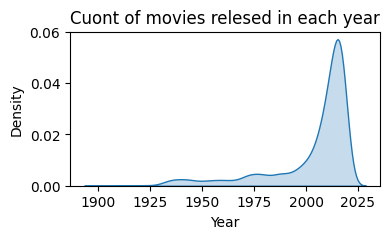

In [56]:
plt.figure(figsize=(4,2))
plt.title('Cuont of movies relesed in each year')
sns.kdeplot(data=movie,x='Year',fill=True)
# checking by pandas
# var= movie.groupby('Year')
# var.agg({'Title':'count'})

# 2.no of movies available in each platform

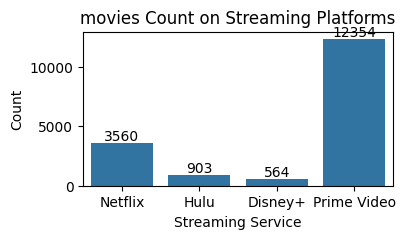

In [ ]:
count_plt= movie[['Netflix','Hulu','Disney+','Prime Video']].sum()
count_plt_df = count_plt.reset_index()
count_plt_df.columns = ['Service', 'Count']

plt.figure(figsize=(4, 2))
a=sns.barplot(x='Service', y='Count', data=count_plt_df)
a.bar_label(a.containers[0])
plt.title("movies Count on Streaming Platforms")
plt.xlabel("Streaming Service")
plt.ylabel("Count")
plt.show()

# 3. no of movies directed by top 10 directors

C:\Users\ashwi\AppData\Local\Temp\ipykernel_9204\134741646.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  b=sns.barplot(x='Directors', y='Number of Movies', data=top_10_df, palette='cool')


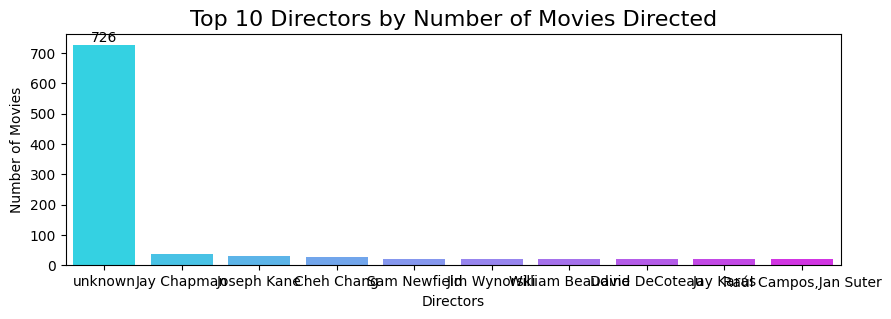

In [58]:
director_count = movie['Directors'].value_counts()
top_10_directors = director_count.head(10)
# filter them 
top_10_df = top_10_directors.reset_index()
top_10_df.columns = ['Directors', 'Number of Movies']
plt.figure(figsize=(10,3))
b=sns.barplot(x='Directors', y='Number of Movies', data=top_10_df, palette='cool')
b.bar_label(b.containers[0])
plt.title("Top 10 Directors by Number of Movies Directed", fontsize=16)
plt.show()

# 4. check the pattren of IMDb rating over the recent decade  and over the year

<Axes: title={'center': 'Average IMDb Ratings Over the recent decades'}, xlabel='Year', ylabel='IMDb'>

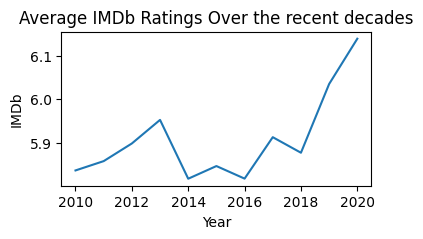

In [59]:
# IMDb rating over recent decade
c=movie[(movie['Year']>2009 ) & (movie['Year']<2021)]
avg_ratings_per_year = c.groupby('Year')['IMDb'].mean().reset_index()
plt.figure(figsize=(4,2))
plt.title('Average IMDb Ratings Over the recent decades')
sns.lineplot(data=avg_ratings_per_year, x='Year', y='IMDb')


the IMDb rating are static untill the 2017 and thereafter ussaly increases  and is at a position of bulled untill the date 

[Text(0, 0, '147')]

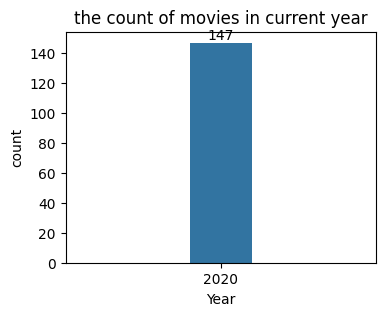

In [60]:
c=movie[movie['Year']==2020]
plt.figure(figsize=(4,3))
plt.title('the count of movies in current year')
d=sns.countplot(data=c,x='Year',width=0.2)
d.bar_label(d.containers[0])

 the current year 2020 has the count of 147 movies


# 5. Number of genres available in each platform (unique of genres and count them )

C:\Users\ashwi\AppData\Local\Temp\ipykernel_9204\2469823645.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  e=sns.barplot(x='Platform', y='Unique Genres Count', data=unique_genres_df, palette='viridis')


Text(0.5, 1.0, 'Number of Unique Genres Available on Each Streaming Platform')

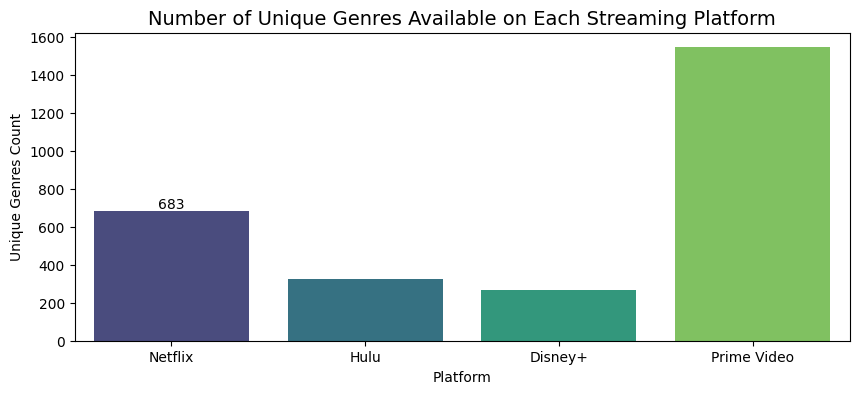

In [85]:
# Create a new DataFrame to store the unique genres for each platform
unique_genres_per_platform = []
# itterate through each platforms 
for platform in ['Netflix', 'Hulu', 'Disney+', 'Prime Video']:
   
    platform_movies = movie[movie[platform] == 1]  # Assuming '1' indicates availability
  
    unique_genres_count = platform_movies['Genres'].nunique()
   # append the vales to dataframe 
    unique_genres_per_platform.append((platform, unique_genres_count))

unique_genres_df = pd.DataFrame(unique_genres_per_platform, columns=['Platform', 'Unique Genres Count'])

plt.figure(figsize=(10,4)) 
e=sns.barplot(x='Platform', y='Unique Genres Count', data=unique_genres_df, palette='viridis')
e.bar_label(e.containers[0])
plt.title('Number of Unique Genres Available on Each Streaming Platform', fontsize=14)

In [ ]:
movie

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Runtime Category
0,1,Inception,2010,13+,8.8,8.7,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.000000,Long (120-180 min)
1,2,The Matrix,1999,18+,8.7,8.7,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.000000,Long (120-180 min)
2,3,Avengers: Infinity War,2018,13+,8.5,8.4,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.000000,Long (120-180 min)
3,4,Back to the Future,1985,7+,8.5,9.6,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.000000,Medium (60-120 min)
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,9.7,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.000000,Long (120-180 min)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16740,The Ghosts of Buxley Hall,1980,18+,6.2,6.5,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.000000,Long (120-180 min)
16740,16741,The Poof Point,2001,7+,4.7,6.5,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.000000,Medium (60-120 min)
16741,16742,Sharks of Lost Island,2013,18+,5.7,6.5,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,93.413447,Medium (60-120 min)
16742,16743,Man Among Cheetahs,2017,18+,6.6,6.5,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,93.413447,Medium (60-120 min)


# 11. average Runtime on each platform

Text(0.5, 1.0, 'Average Runtime per platform')

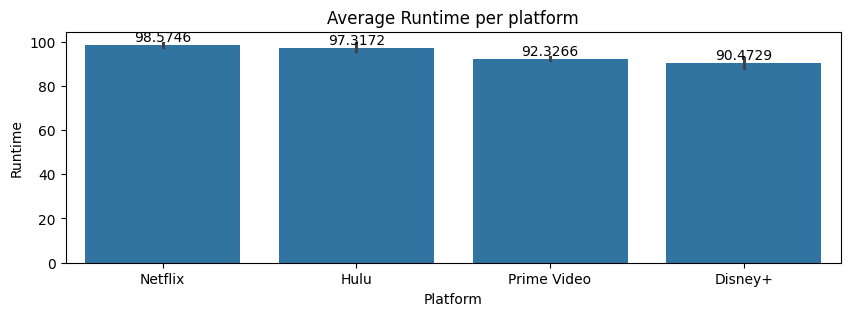

In [74]:
plt.figure(figsize=(10,3))
f=sns.barplot(data=Platforms_df,x='Platform',y='Runtime')
f.bar_label(f.containers[0])
plt.title('Average Runtime per platform')

Text(0.5, 1.0, 'Average Runtime per platform')

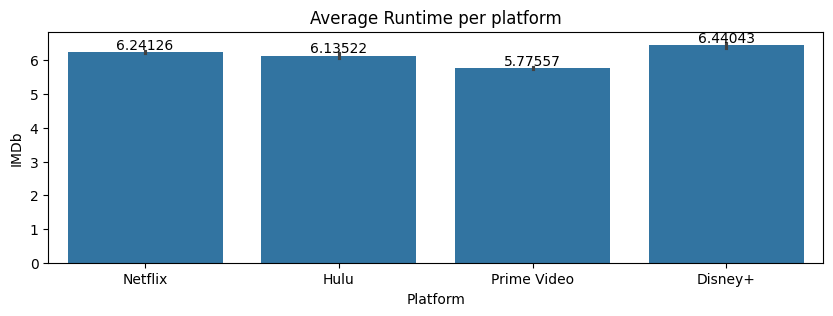

In [ ]:
plt.figure(figsize=(10,3))
f=sns.barplot(data=Platforms_df,x='Platform',y='IMDb')
f.bar_label(f.containers[0])
plt.title('Average IMDb rating per platform')

# 12. top 5 IMDb ratings per platform by their TItle , Runtime , Rotten , GENRES

In [117]:
movie['tot_plts']=movie[movie.columns[[6,7,8,9]]].sum(axis=1)

In [118]:
a=Platforms_df['IMDb'].unique()
a.sort()
imdb5=a[-6:-1:]


In [121]:
top5_df=movie[movie['IMDb'].isin(imdb5)][['Title','Rotten Tomatoes','Genres', 'Runtime','tot_plts']]
top5_df.shape

(55, 5)